 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
# Reading whale returns
whale_df = pd.read_csv("whale_returns.csv", index_col="Date", parse_dates=True)

In [6]:
# Count nulls
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [11]:
# Reading algorithmic returns
algo_df = pd.read_csv("algo_returns.csv", index_col="Date", parse_dates=True)

In [12]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv("sp_tsx_history.csv", index_col="Date", parse_dates=True)

In [22]:
# Check Data Types
sp_tsx_df.dtypes

Close    float64
dtype: object

In [26]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")


In [27]:
# Calculate Daily Returns
sp_tsx_df["Daily_Returns"] = sp_tsx_df["Close"].pct_change()

In [28]:
# Drop nulls
sp_tsx_df.dropna(inplace=True)

In [29]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df.rename(columns={"Close": "S&P TSX 60 Close"}, inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [30]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_tsx_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Close,Daily_Returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot: title={'center': 'Daily Returns'}, xlabel='Date'>

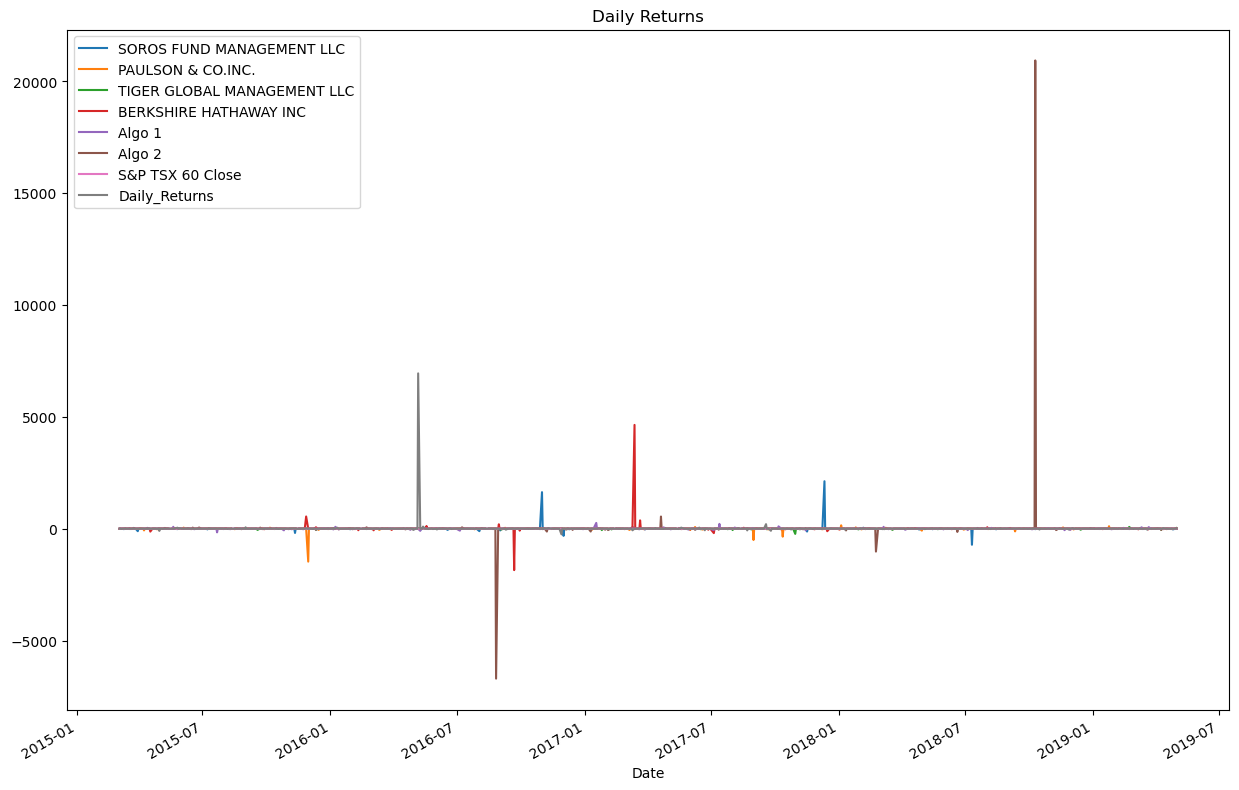

In [136]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=(15, 10), title="Daily Returns")



#### Calculate and Plot cumulative returns.

In [140]:

cumulative_returns = (1 + daily_returns).cumprod()


/Users/kainat/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


In [141]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).dropna().cumprod()


<AxesSubplot: title={'center': 'Cumulative Returns'}, xlabel='Date'>

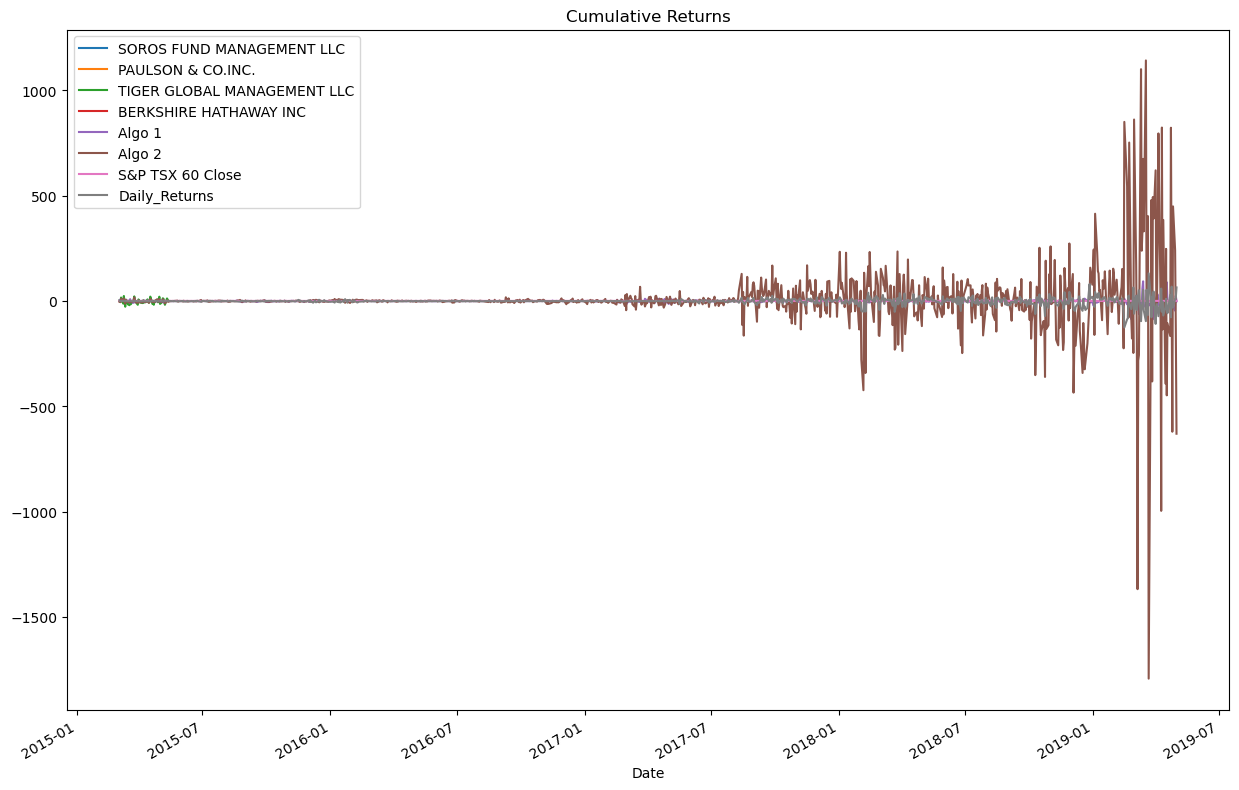

In [142]:

# Plot cumulative returns
cumulative_returns.plot(figsize=(15, 10), title="Cumulative Returns")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot: title={'center': 'Box Plot: Daily Returns'}>

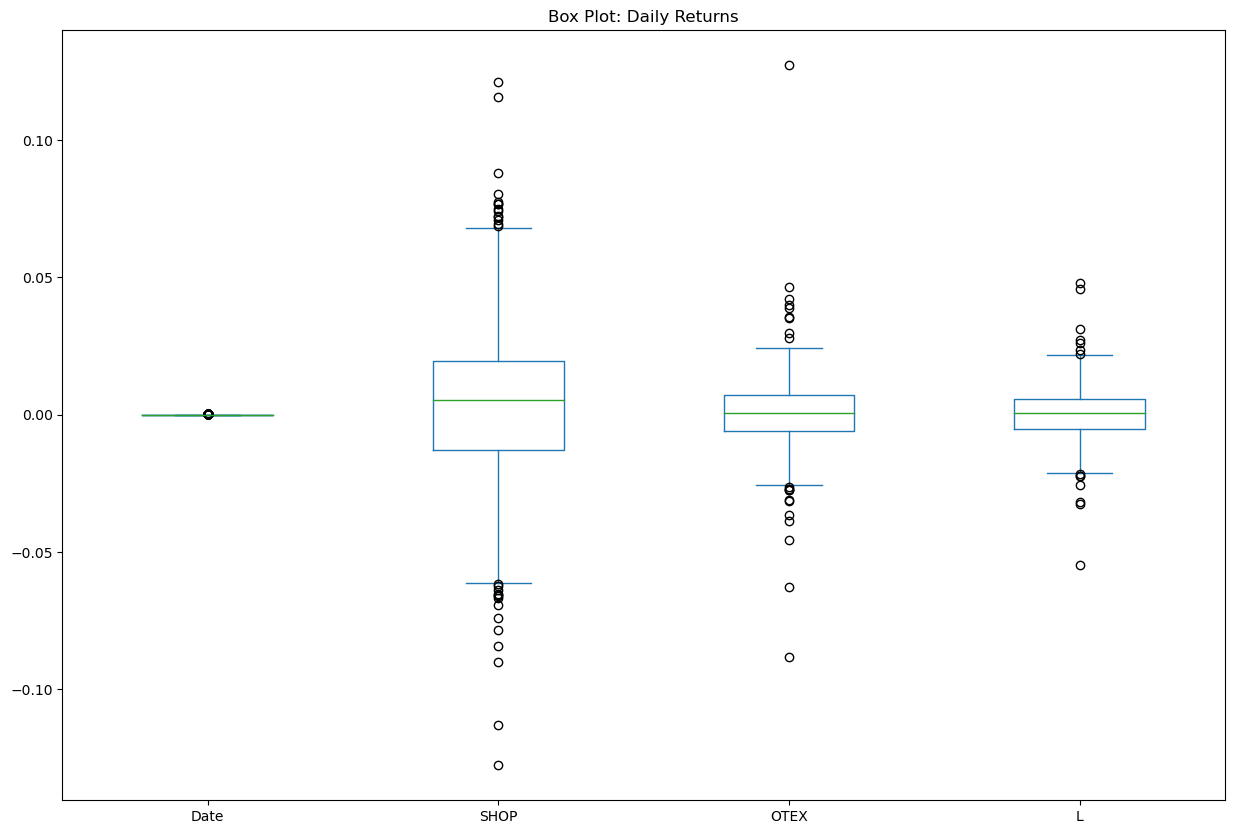

In [216]:
# Box plot to visually show risk
daily_returns.plot(kind="box", figsize=(15, 10), title="Box Plot: Daily Returns")



### Calculate Standard Deviations

In [217]:
# Calculate the daily standard deviations of all portfolios
std_deviation = daily_returns.std()


### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std_deviation = daily_returns["S&P TSX 60 Close"].std()

# Determine which portfolios are riskier than the S&P TSX 60
riskier_than_tsx = std_deviation > sp_tsx_std_deviation



### Calculate the Annualized Standard Deviation

In [149]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_deviation = std_deviation * np.sqrt(252)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot: title={'center': 'Rolling Standard Deviation (21-day window)'}, xlabel='Date'>

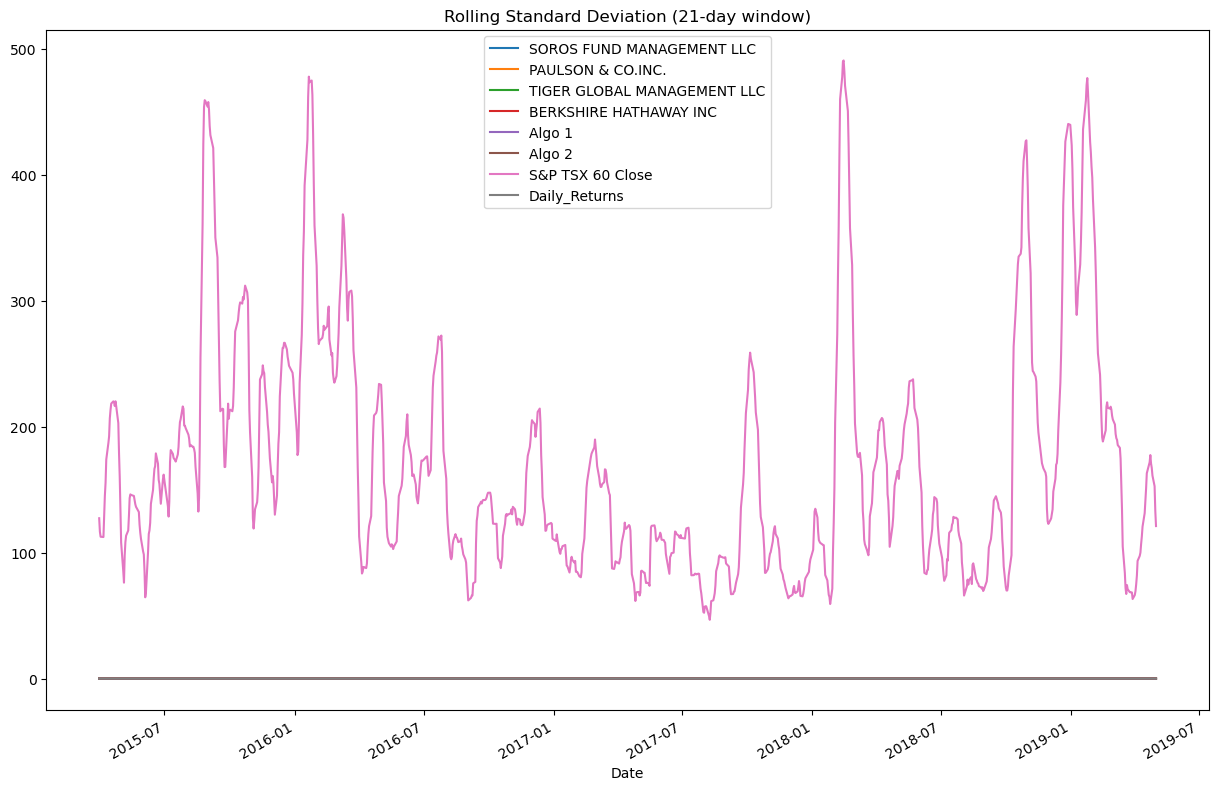

In [160]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_std_dev = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_dev.plot(figsize=(15,10), title="Rolling Standard Deviation (21-day window)")




### Calculate and plot the correlation

In [164]:
# Calculate the correlation

correlation = combined_df.corr()

# Display de correlation matrix
print(correlation)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P TSX 60 Close                              0.065582            0.057284   
Daily_Returns                                 0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524 

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot: title={'center': 'Rolling Algo 1 Beta (60-day window)'}, xlabel='Date'>

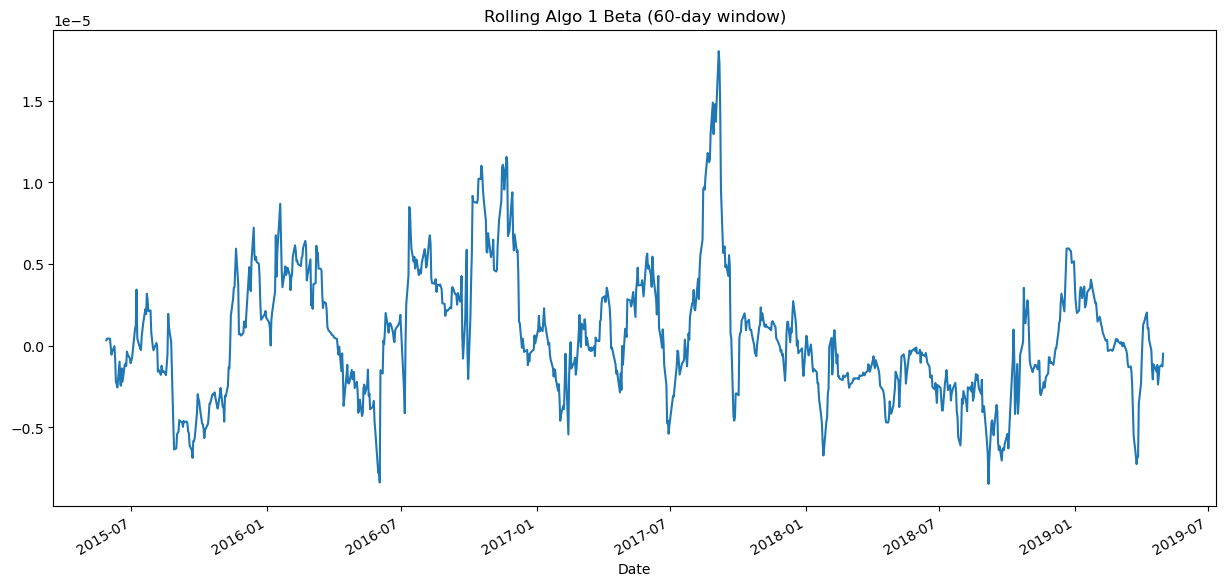

In [167]:
# Calculate covariance of a single portfolio
portfolio = 'Algo 1'
# Calculate variance of S&P TSX
index = 'S&P TSX 60 Close'
covariance = combined_df[portfolio].rolling(window=60).cov(combined_df[index])
variance = combined_df[index].rolling(window=60).var()


# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(15, 7), title=f'Rolling {portfolio} Beta (60-day window)')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot: title={'center': 'Exponentially Weighted Moving Average (21-day half life)'}, xlabel='Date'>

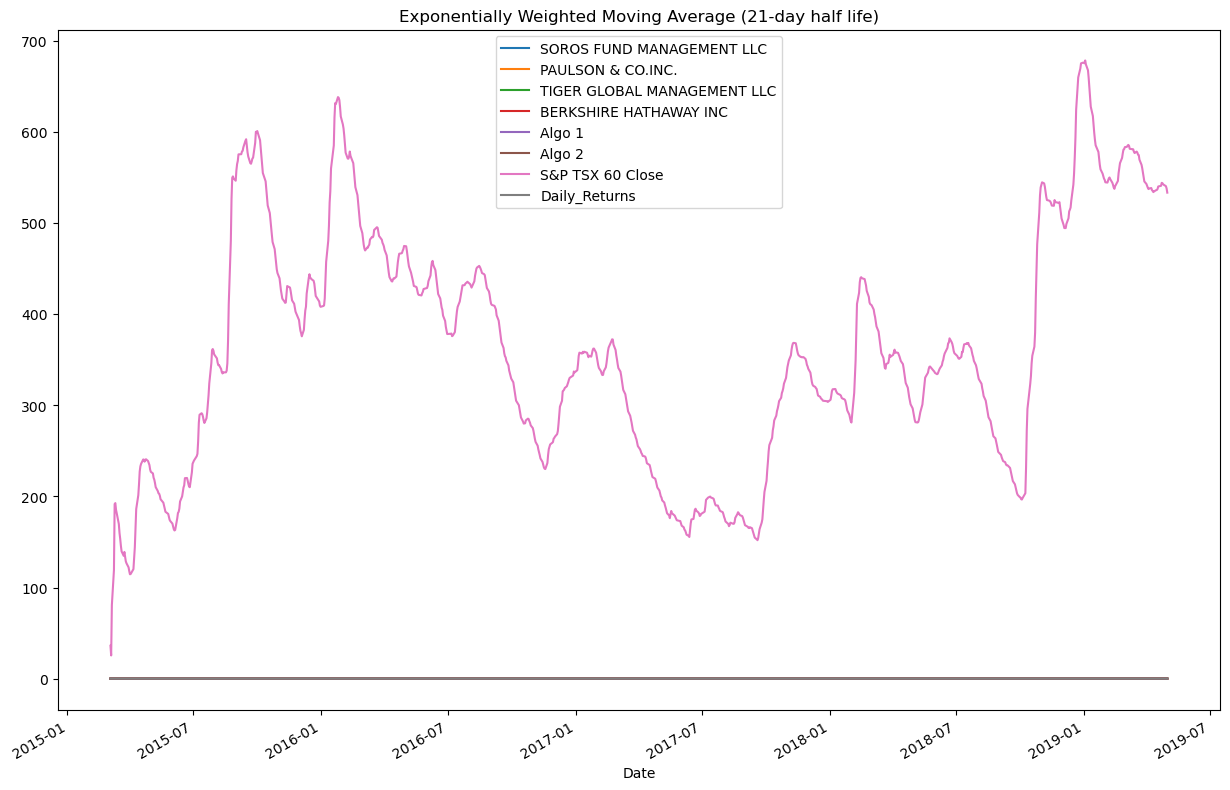

In [169]:
# Use `ewm` to calculate the rolling window

ewm_std_dev = combined_df.ewm(halflife=21).std()

# Plot the exponentially weighted moving average
ewm_std_dev.plot(figsize=(15,10), title="Exponentially Weighted Moving Average (21-day half life)")


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [173]:
# Annualized Sharpe Ratios
annualized_returns = daily_returns.mean() * 252
annualized_std_dev = daily_returns.std() * np.sqrt(252)
sharpe_ratios = annualized_returns / annualized_std_dev

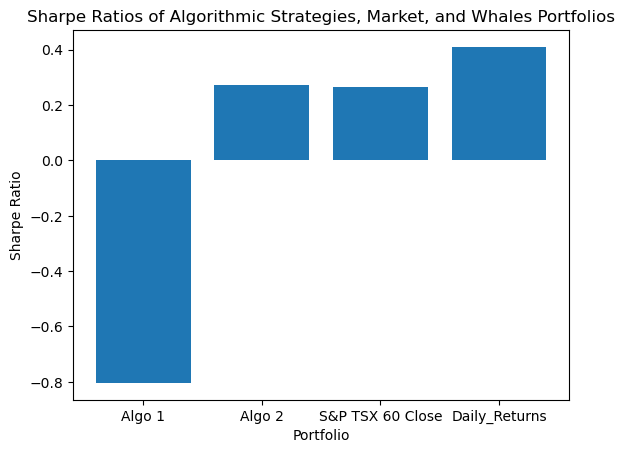

In [174]:
# Visualize the sharpe ratios as a bar plot
plt.bar(sharpe_ratios.index, sharpe_ratios.values)
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Algorithmic Strategies, Market, and Whales Portfolios')
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [182]:
stocks = {'SHOP': 'Shopify Inc.', 'OTEX': 'Open Text Corporation', 'L': 'Loblaw Companies Limited'}

# Reading data from 1st stock
shop_df = pd.read_csv('shop_historical.csv', index_col='Date', parse_dates=True)

In [183]:
# Reading data from 2nd stock
otex_df = pd.read_csv('otex_historical.csv', index_col='Date', parse_dates=True)

In [184]:
# Reading data from 3rd stock
l_df = pd.read_csv('l_historical.csv', index_col='Date', parse_dates=True)


In [185]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([shop_df['Close'], otex_df['Close'], l_df['Close']], axis=1)
portfolio_df.columns = ['SHOP', 'OTEX', 'L']

In [186]:
# Reset Date index
portfolio_df = portfolio_df.reset_index()

In [187]:
# Reorganize portfolio data by having a column per symbol

melted_df = portfolio_df.reset_index().melt(id_vars=['Date'], var_name='Symbol', value_name='Close')

reorganized_df = melted_df.pivot(index='Date', columns='Symbol', values='Close')


In [191]:
portfolio_df = portfolio_df.apply(pd.to_numeric, errors='coerce')
portfolio_df.dropna(inplace=True)

In [194]:

# Calculate daily returns
daily_returns = portfolio_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,Date,SHOP,OTEX,L
1,0.000057,0.023398,-0.011703,-0.010002
2,0.000057,0.017092,-0.003715,0.000174
3,0.000057,-0.001455,-0.007924,0.000000
4,0.000171,0.016392,-0.009631,-0.009753
5,0.000057,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [199]:
daily_returns_no_date = daily_returns.iloc[:, 1:]

In [200]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_no_date.dot(weights)
portfolio_returns.name = 'Portfolio'

# Display sample data
portfolio_returns.head()

1    0.000565
2    0.004517
3   -0.003126
4   -0.000997
5   -0.000999
Name: Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [201]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = daily_returns.join(portfolio_returns)


In [202]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [203]:
# Calculate the annualized `std`
annualized_std = daily_returns.std() * np.sqrt(252)


### Calculate and plot rolling `std` with 21-day window

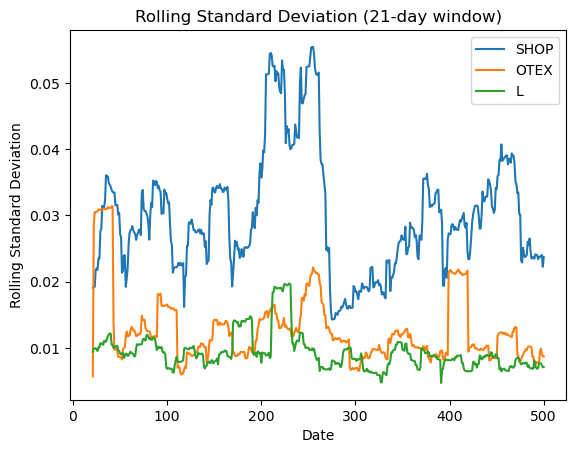

In [205]:
# Calculate rolling standard deviation
rolling_std = daily_returns.rolling(window=21).std()
# Plot rolling standard deviation
plt.plot(rolling_std.index, rolling_std['SHOP'], label='SHOP')
plt.plot(rolling_std.index, rolling_std['OTEX'], label='OTEX')
plt.plot(rolling_std.index, rolling_std['L'], label='L')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.title('Rolling Standard Deviation (21-day window)')
plt.show()

### Calculate and plot the correlation

In [207]:
import seaborn as sns


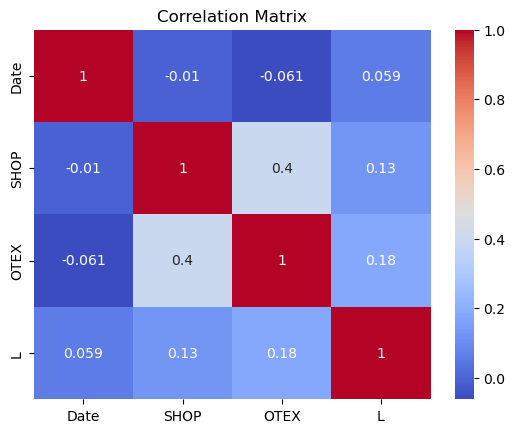

In [208]:
# Calculate and plot the correlation
corr_matrix = daily_returns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [223]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [226]:
# Calculate Annualized Sharpe Ratios
average_annual_return = portfolio_returns.mean() * 252
average_annual_return
annualized_std = daily_returns.std() * np.sqrt(252)
annualized_std
sharpe_ratios = (average_annual_return - 0.02) / annualized_std
sharpe_ratios

Date    422.200410
SHOP      0.679257
OTEX      1.543071
L         2.178691
dtype: float64

<AxesSubplot: title={'center': 'Sharpe Ratios'}>

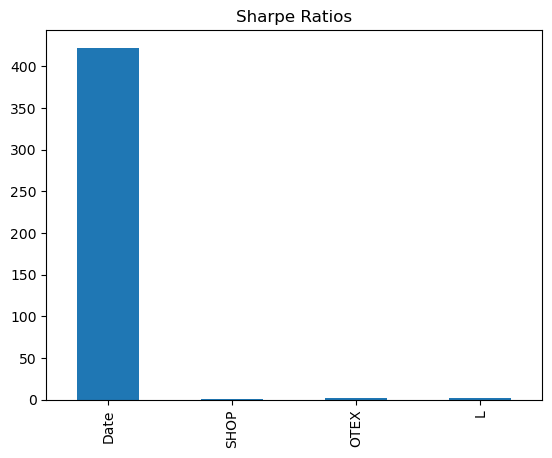

In [227]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
# Calculate covariance of a single portfolio
portfolio = 'Algo 1'
# Calculate variance of S&P TSX
index = 'S&P TSX 60 Close'
covariance = combined_df[portfolio].rolling(window=60).cov(combined_df[index])
variance = combined_df[index].rolling(window=60).var()


# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(15, 7), title=f'Rolling {portfolio} Beta (60-day window)')